# Image Classification

### This notebook aims to classify different vehicles from images using a simple convolutional neural network

### @author: HuidobroMG

In [47]:
# Import the modules
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.metrics import CategoricalAccuracy

In [24]:
# Directory of files
data_dir = 'images_dataset'

# Images possible extensions
image_exts = ['jpeg', 'png', 'bmp']

# Find the classes, the number of images for each one and clean the files
classes = os.listdir(data_dir)

for c in classes:
    list_images = os.listdir(os.path.join(data_dir, c))
    for image in list_images:
        img_path = os.path.join(data_dir, c, image)
        img_ext = imghdr.what(img_path)
        if img_ext not in image_exts: os.remove(img_path)
        else:
            try: img = cv2.imread(img_path)
            except: os.remove(img_path)

    list_images = os.listdir(os.path.join(data_dir, c))
    print('Number of {}'.format(c), len(list_images))

Number of cars 103
Number of motorbikes 115
Number of planes 116


In [25]:
# Read the clean data with tf
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 334 files belonging to 3 classes.


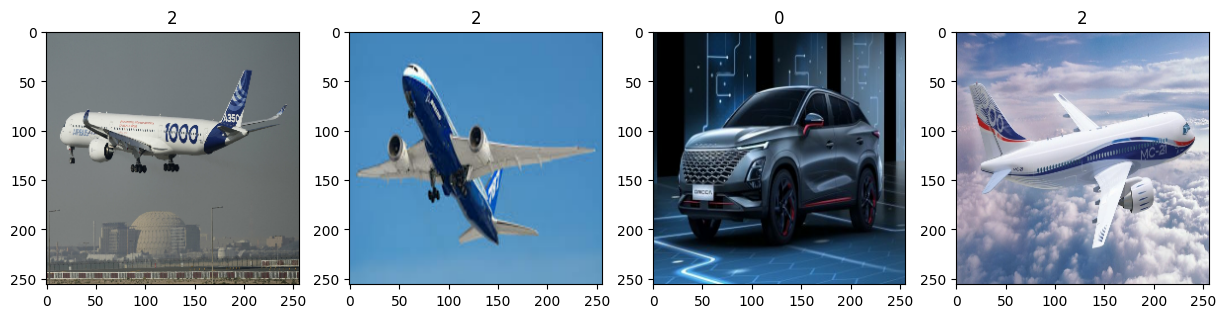

In [29]:
# Plot some examples
fig, axs = plt.subplots(ncols = 4, figsize = (15, 5))
for i in range(4):
    axs[i].imshow(batch[0][i].astype(int))
    axs[i].set_title(str(batch[1][i]))

In [32]:
# Rescale the data
scaled_data = data.map(lambda x, y: (x/255, y))

# Split between train, val and test
N = len(scaled_data)
train_size = int(N*0.7)
val_size = int(N*0.2) + 1
test_size = int(N*0.1) + 1

train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

In [ ]:
# Clear any built model
tf.keras.backend.clear_session()

In [33]:
# Build the model
model = Sequential()

model.add(Conv2D(32, (3,3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',  # It is not one-hot-encoded
              metrics = ['accuracy'])

# Summary of the model
model.summary()

C:\Users\huido\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     7,373,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,411,683 (28.27 MB)

 Trainable params: 7,411,683 (28.27 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Train the model
history = model.fit(train, epochs = 30, validation_data = val)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.4763 - loss: 1.6035 - val_accuracy: 0.2917 - val_loss: 1.0588
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.4469 - loss: 0.9593 - val_accuracy: 0.6875 - val_loss: 0.7588
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.6968 - loss: 0.6910 - val_accuracy: 0.8438 - val_loss: 0.3848
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.8156 - loss: 0.4649 - val_accuracy: 0.8438 - val_loss: 0.3394
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.8837 - loss: 0.3595 - val_accuracy: 0.9688 - val_loss: 0.2310
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9366 - loss: 0.2276 - val_accuracy: 0.9271 - val_loss: 0.1853
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9243 - loss: 0.2316 - val_accuracy: 0.9271 - val_loss: 0.1913
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.9426 - loss: 0.1743 - val_accuracy: 0.9896 - val_loss: 0.0804
Epoch 9/

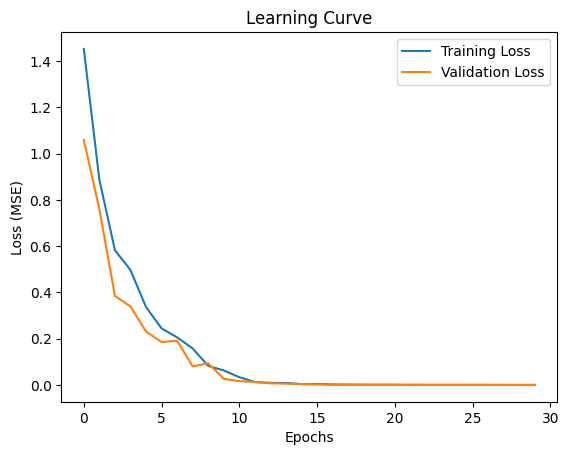

In [35]:
# Plot the learning curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')

plt.title('Learning Curve')

plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

plt.legend()

plt.show()

In [48]:
# Compute the metrics for multi-class classification
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    y_pred_prob = model.predict(X)  # Predictions as probabilities

    # Convert predictions from probabilities to class labels
    y_pred = np.argmax(y_pred_prob, axis=-1)  # Get the class with the highest probability

    pre.update_state(y, y_pred)
    re.update_state(y, y_pred)
    acc.update_state(y, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


In [49]:
# Get the metric values
precision_value = pre.result().numpy()
recall_value = re.result().numpy()
accuracy_value = acc.result().numpy()

print(f'Precision: {precision_value:.4f}')
print(f'Recall: {recall_value:.4f}')
print(f'Accuracy: {accuracy_value:.4f}')

Precision: 1.0000
Recall: 1.0000
Accuracy: 1.0000
